In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

In [190]:
class RidgeRegression:
    def __init__(self, eta = 0.001, diff = 0.001, w = [1], maxiter = 10000, alpha = 1.0):
        self.eta = eta
        self.diff = diff
        self.w = w
        self.maxiter = maxiter
        self.alpha = alpha
        
    def loss_function(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  # + 1, żeby jeszcze miejsce na w0 było :P
        C = 0
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            C += (sum([x * w for x, w in list_for_addin_up]) + self.w[-1] - t[i])**2
        return C/(2*len(t)) + self.alpha * sum([w**2 for w in self.w])
    
    def update_weights(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  
        dC = [0] * no_var
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            y_pred =  sum([x * w for x, w in zip(X[i], self.w)]) + self.w[-1]
            for variable in range(len(self.w)):
                try:
                    dC[variable] += X[i][variable] * (y_pred - t[i])
                except:
                    dC[variable] += (y_pred - t[i])
        for weight in range(no_var):
            self.w[weight] -= self.eta * (dC[weight]/N)
            
    def train(self, X, t):
        l = []
        ile = 0
        while True:
            l.append(self.loss_function(X, t))
            self.update_weights(X, t)
            ile += 1
            if len(l) > 2:
                if abs(l[-1]-l[-2])/l[-1] <  self.diff or ile > self.maxiter:
                    break
        return l             
                    
                    
class LassoRegression:
    def __init__(self, eta = 0.001, diff = 0.001, w = [1], maxiter = 10000, alpha = 1.0):
        self.eta = eta
        self.diff = diff
        self.w = w
        self.maxiter = maxiter
        self.alpha = alpha
        
    def loss_function(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  # + 1, żeby jeszcze miejsce na w0 było :P
        C = 0
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            C += (sum([x * w for x, w in list_for_addin_up]) + self.w[-1] - t[i])**2
        return C/(2*len(t)) + self.alpha * sum([np.abs(w) for w in self.w])
    
    def update_weights(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  
        dC = [0] * no_var
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            y_pred =  sum([x * w for x, w in list_for_addin_up]) + self.w[-1]
            for variable in range(len(self.w)):
                try:
                    dC[variable] += X[i][variable] * (y_pred - t[i])
                except:
                    dC[variable] += (y_pred - t[i])
        for weight in range(no_var):
            self.w[weight] -= self.eta * (dC[weight]/N)
            
    def train(self, X, t):
        l = []
        ile = 0
        while True:
            l.append(self.loss_function(X, t))
            self.update_weights(X, t)
            ile += 1
            if len(l) > 2:
                if abs(l[-1]-l[-2])/l[-1] <  self.diff or ile > self.maxiter:
                    break
                       
        return l

In [191]:
X = np.array([[1,4],[5,6],[2,2],[6,7],[9,-4],[-2,-3],[-5,1]])
y = np.dot(X, [3, -4])+5  #y=3x1-4x2+5

In [194]:
model = LassoRegression(alpha = 0.0000000000000001)
a = model.train(X, y)

In [195]:
model.w, model.loss_function(X, y)

([3.000309260729557, -3.999675320045806, 4.99577829150021],
 6.215829034786601e-06)

## Zadanie 2

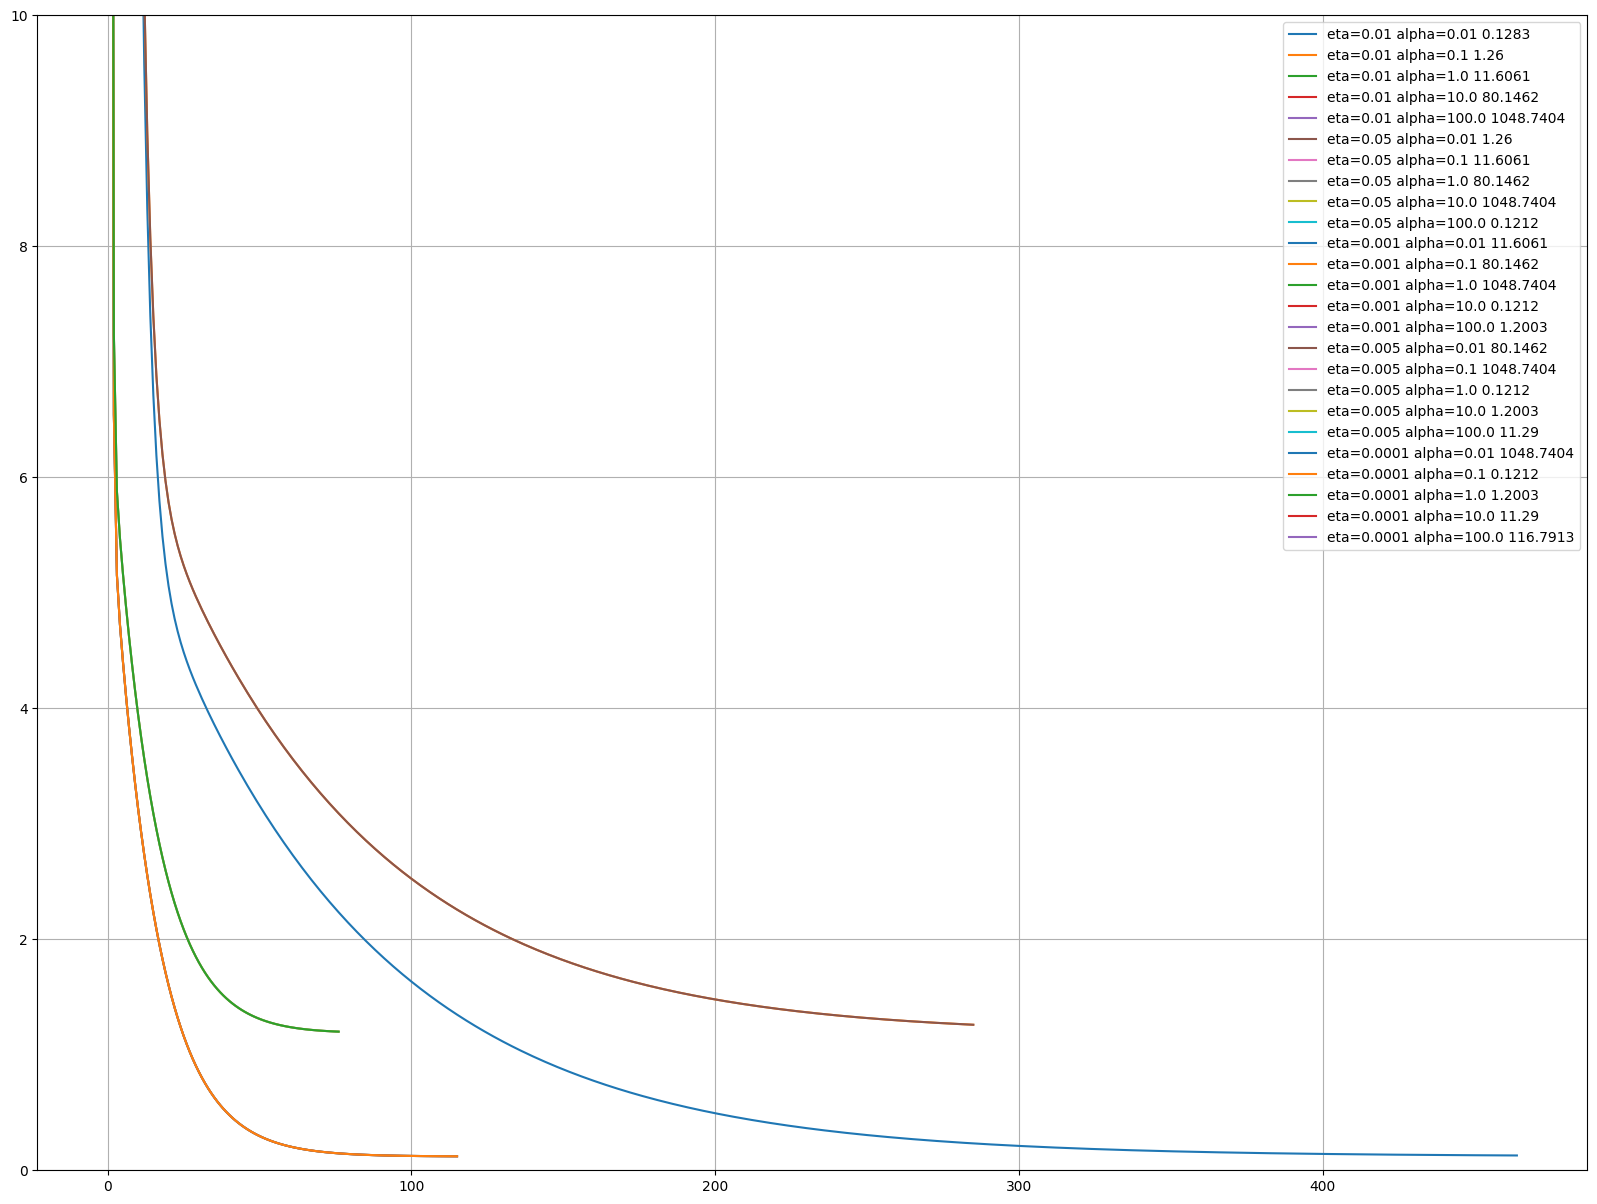

In [91]:
ni = [0.01, 0.05, 0.001, 0.005, 0.0001]
alpha = [0.01, 0.1, 1.0, 10.0, 100.0]
lista_LF = []
for ni_ in ni:
    for alpha_ in alpha:
        model = LassoRegression(eta = ni_, alpha = alpha_)
        lista_LF.append(model.train(X, y))
x = [x for x in range(len(X))]
for i in range(5):
    for k in range(5):
        plt.plot(lista_LF[i+k], label = f"eta={ni[i]} alpha={alpha[k]} {np.around(lista_LF[i+k][-1], 4)}")
plt.legend()
plt.grid()
plt.ylim([0,10])
plt.show()
        

#najlepsze dla eta = 0.005, alpha = 1.0

## Zadanie 3

In [100]:
w1, w2, x0 = -0.39682866, -0.82497163, 0.11932619
praw_1 = 1/(1+np.exp(-(w1*3 + w2*3 + x0)))
praw_0 = 1 - praw_tak
print(praw_0, praw_1)

0.9719706839711546 0.02802931602884544


## Zadanie *

In [292]:
class RidgeLogisticRegression:
    def __init__(self, eta = 0.01, diff = 0.001, w = [1], maxiter = 10000, alpha = 1.0, y = 1):
        self.eta = eta
        self.diff = diff
        self.w = w
        self.maxiter = maxiter
        self.alpha = alpha
        self.y = y
        
    def sigmoid(self, X, weight):
        return 1/(1 + np.exp(X*weight))
                  
    def loss_function(self, X, t, y):
        N = len(X)
        no_var = len(X[0]) + 1  # + 1, żeby jeszcze miejsce na w0 było :P
        C = 0
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            value = 1/(1+np.exp(sum([x*w for x,w in list_for_addin_up]) + self.w[-1]))
            #C += sum(y * np.log([self.sigmoid(x, w) for x, w in list_for_addin_up]) + (1 - y)*np.log(1-np.sum([self.sigmoid(x, w) for x, w in list_for_addin_up])))
            C += y * np.log(value) + (1 - y)*np.log(1 - (1/(value)))
        return -C/(2*len(t)) + self.alpha * sum([w**2 for w in self.w])
    
    def update_weights(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  
        dC = [0] * no_var
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            y_pred =  sum([self.sigmoid(x, w) for x, w in list_for_addin_up]) + self.w[-1]
            for variable in range(len(self.w)):
                try:
                    dC[variable] += X[i][variable] * (y_pred - t[i])
                except:
                    dC[variable] += (y_pred - t[i])
        for weight in range(no_var):
            self.w[weight] = self.w[weight] - self.eta * (dC[weight]/N)
            
    def train(self, X, t):
        l = []
        ile = 0
        while True:
            l.append(self.loss_function(X, t, self.y))
            self.update_weights(X, t)
            ile += 1
            if len(l) > 2:
                if ile > self.maxiter:
                    break
        #return l             
                    
                    
class LassoLogisticRegression:
    def __init__(self, eta = 0.001, diff = 0.001, w = [1], maxiter = 10000, alpha = 1.0):
        self.eta = eta
        self.diff = diff
        self.w = w
        self.maxiter = maxiter
        self.alpha = alpha
        
    def loss_function(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  # + 1, żeby jeszcze miejsce na w0 było :P
        C = 0
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            C += (sum([x * w for x, w in list_for_addin_up]) + self.w[-1] - t[i])**2
        return C/(2*len(t)) + self.alpha * sum([np.abs(w) for w in self.w])
    
    def update_weights(self, X, t):
        N = len(X)
        no_var = len(X[0]) + 1  
        dC = [0] * no_var
        self.w = self.w * no_var if len(self.w) != no_var else self.w
        for i in range(N):
            list_for_addin_up = zip(X[i], self.w)
            y_pred =  sum([x * w for x, w in zip(X[i], self.w)]) + self.w[-1]
            for variable in range(len(self.w)):
                try:
                    dC[variable] += X[i][variable] * (y_pred - t[i])
                except:
                    dC[variable] += (y_pred - t[i])
        for weight in range(no_var):
            self.w[weight] = self.w[weight] - self.eta * (dC[weight]/N)
            
    def train(self, X, t):
        l = []
        ile = 0
        while True:
            l.append(self.loss_function(X, t, y))
            self.update_weights(X, t)
            ile += 1
            if len(l) > 2:
                if abs(l[-1]-l[-2])/l[-1] <  self.diff or ile > self.maxiter:
                    break
                       
        #return l

In [293]:
model = RidgeLogisticRegression()
X = np.array([[1,2],[2,3],[4,5],[1,-4],[5,-7],[-3,-1]])
y  = np.array([0, 0, 0, 1, 1, 1])
model.train(X,y)

/tmp/ipykernel_143/1362917590.py:22: RuntimeWarning: invalid value encountered in log
  C += y * np.log(value) + (1 - y)*np.log(1 - (1/(value)))
/tmp/ipykernel_143/1362917590.py:22: RuntimeWarning: divide by zero encountered in log
  C += y * np.log(value) + (1 - y)*np.log(1 - (1/(value)))
/tmp/ipykernel_143/1362917590.py:22: RuntimeWarning: invalid value encountered in double_scalars
  C += y * np.log(value) + (1 - y)*np.log(1 - (1/(value)))
/tmp/ipykernel_143/1362917590.py:11: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(X*weight))
/tmp/ipykernel_143/1362917590.py:20: RuntimeWarning: overflow encountered in exp
  value = 1/(1+np.exp(sum([x*w for x,w in list_for_addin_up]) + self.w[-1]))
/tmp/ipykernel_143/1362917590.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  C += y * np.log(value) + (1 - y)*np.log(1 - (1/(value)))


In [294]:
model.w, #model.loss_function

([-142.46676710150538, -355.67970782985833, -0.8333333333333389],)

## Zadanie 4

In [187]:
w1, w2, w3 = [0.01577681, -0.05318977,  0.21160694, 0.14655186, -0.24476592, -0.00318551, -0.20914917, -0.26505038, -0.02765106, 0.26778537], [0.20327639, 0.0990516, -0.39851296, -0.1045002, 0.02344135, -0.06340171, 0.19494493, 0.54495946, -0.18417782, -0.2844254], [-0.2190532, -0.04586183,  0.18690602, -0.04205165, 0.22132456,  0.06658722, 0.01420424, -0.27990908,  0.21182888,  0.01664003]
w0 = [0.0294703,  -0.26754233,  0.23807203]
y = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
praw_1 = []
zbc = 0
for i in [w1, w2, w3]:
    praw_1.append((sum([x * w for x, w in zip(y, i)]) + w0[zbc]))
    zbc += 1
klasyfikatory = praw_1
cp = np.exp(klasyfikatory)
pradowpodobienstwa = cp/np.sum(cp)
pradowpodobienstwa

array([0.16470456, 0.50297138, 0.33232406])

## Zadanie 5

rozjazd w wagach danych współczynników w zależności od C (czyli regularyzacji (1/alfa) ) - widać, że wraz ze wzrostem "mnożnika" wag - ich wpływ na funkcję kosztu ulega znaczącemu wzrostowi (czy to na +, czy na -)